In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/earth_engine.parquet")
df.head()

,name,total_pixels,elevation_mean,elevation_min,elevation_max,day_temp_mean,day_temp_min,day_temp_max,night_temp_mean,night_temp_min,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
0,-124.0_39.0,207,1.658163,0,122,14.595580,13.059459,16.214765,8.452422,8.012623,...,0.004464,0.004464,0.004464,0.013393,0.004464,0.004464,0.004464,0.004464,0.004464,0.866071
1,-124.0_39.25,364,21.992347,0,249,16.040017,12.343750,20.449413,8.594599,7.631127,...,0.005249,0.002625,0.002625,0.002625,0.002625,0.020997,0.002625,0.002625,0.002625,0.601050
2,-124.0_39.5,337,26.429847,0,540,15.394678,12.065294,20.300647,9.696211,7.439498,...,0.002825,0.005650,0.014124,0.022599,0.002825,0.002825,0.002825,0.002825,0.002825,0.714689
3,-124.0_39.75,566,226.927296,0,640,17.491069,11.434158,21.501581,10.761999,9.592399,...,0.001715,0.001715,0.001715,0.012007,0.001715,0.001715,0.001715,0.001715,0.001715,0.336192
4,-124.0_40.0,596,361.941799,69,802,20.258292,16.949764,24.345318,10.363186,9.282429,...,0.094617,0.024470,0.004894,0.001631,0.001631,0.001631,0.001631,0.001631,0.001631,0.001631


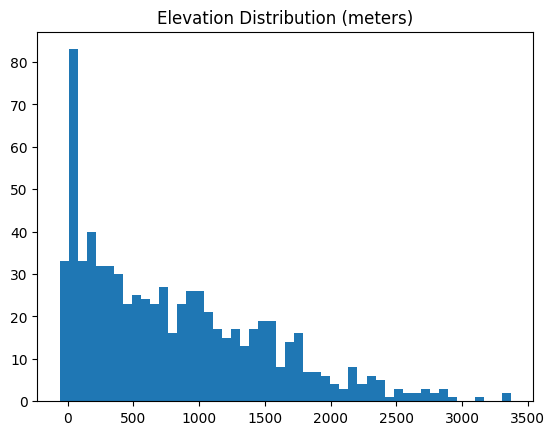

In [10]:
plt.hist(df["elevation_mean"], bins=50)
plt.title("Elevation Distribution (meters)")
plt.show()

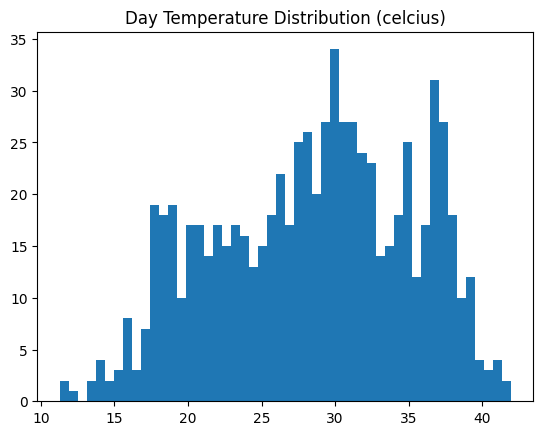

In [9]:
plt.hist(df[df.day_temp_mean > -10]["day_temp_mean"], bins=50)
plt.title("Day Temperature Distribution (celcius)")
plt.show()

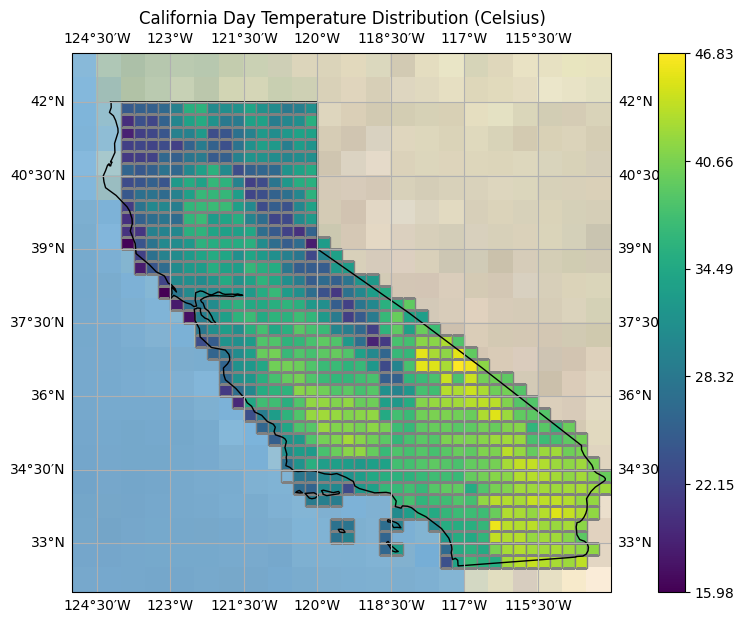

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from birdcall_distribution.geo import get_shape_us_state, generate_grid
import numpy as np

ca_shape = get_shape_us_state("California")
grid = generate_grid(ca_shape, (-124, -114, 32, 42), (0.25, 0.25))

# plot map with lattice of polygons
fig = plt.figure(figsize=(12, 7))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.set_xlim([-125, -114])
ax.set_ylim([32, 43])
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


# c to f
property = df.day_temp_max
expected = property.mean()
vmin = property.min()
vmax = property.max()
color_getter = lambda x: plt.get_cmap("viridis")(np.interp(x, [vmin, vmax], [0, 1]))

for key, polygon in grid.items():
    ax.add_feature(
        cfeature.ShapelyFeature([polygon], projection),
        edgecolor="gray",
        facecolor=color_getter(df[df.name == key].day_temp_max.values[0]),
    )

ax.add_feature(
    cfeature.ShapelyFeature([ca_shape.geometry], projection),
    edgecolor="k",
    facecolor=(1, 1, 1, 0),
)

cbar = fig.colorbar(plt.matplotlib.cm.ScalarMappable(norm=None, cmap="viridis"))
cbar.set_ticks(np.linspace(0, 1, 6))
cbar.set_ticklabels(
    [f"{round(np.interp(x, [0, 1], [vmin, vmax]), 2)}" for x in cbar.get_ticks()]
)
ax.stock_img()
plt.title("California Day Temperature Distribution (Celsius)")
plt.show()